# <center>Previsão</center>

## 1 - Definição do Problema

Esse projeto tem o objetivo de fazer a previsão dos preços de aluguéis de imóveis feitos pela plataforma Airbnb na cidade do Rio de Janeiro.

Logo, o problema em questão trata-se de um problema de Regressão

## 2 - Carga dos Dados

In [18]:
# imports
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

In [19]:
# os dados são lidos e carregados em um Dataframe chamado df
df = pd.read_parquet('./data/airbnb_RJ.parquet')
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


## 3 - Análise Exploratória dos dados

In [20]:
df.shape

(29546, 15)

A base de dados possui 29546 registros e 15 colunas.

In [21]:
# Tipos de Dados
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

Todos os valores são do tipo float

In [22]:
# Verificando valores missing
print(df.isna().sum())

id                                   0
name                                33
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9987
reviews_per_month                 9987
calculated_host_listings_count       0
availability_365                     0
dtype: int64


Analisando-se a existência de valores faltantes, chegou-se as seguintes conclusões:
- Existem 33 valores ausentes para a variável "name".
- 1 valor faltante para a variável "host_name".
- 9987 valores faltantes para as variáveis "last_review" e "reviews_per_month".

como as variáveis "name" e "host_name" não têm valor preditivo, elas serão desconsideradas, e por tal razão tais valores não prejudicarão as análises.

Como as colunas "last_review" e "reviews_per_month" possuem grande quantidade de valores nulos, optou-se por retirá-las da base de dados.

In [23]:
#retiranda da variável ESTIMATEDLOG da base de dados
df.drop(["name", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True)
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,17878,68997,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,1,0
1,21280,81163,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,1,69
2,25026,102840,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,3,95
3,31560,135635,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,1,0
4,35636,153232,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,1,358


In [24]:
df.shape

(29546, 11)

In [25]:
# Verificando Valores Únicos
df.nunique()

id                                29546
host_id                           20544
neighbourhood                        69
latitude                          10037
longitude                         12569
room_type                             4
price                               571
minimum_nights                        8
number_of_reviews                   265
calculated_host_listings_count       47
availability_365                    366
dtype: int64

As variáveis id e host_id são variáveis de identificação e por isso serão retiradas da base de dados

In [26]:
df.drop(['id','host_id'], axis=1, inplace=True)
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,1,0
1,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,1,69
2,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,3,95
3,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,1,0
4,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,1,358


In [27]:
df.dtypes

neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

As únicas variáveis que não são contínuas são: neighbourhood e room_type

### Análise das variáveis categóricas

In [28]:
df.neighbourhood.value_counts()

Copacabana         8490
Barra da Tijuca    2917
Ipanema            2598
Botafogo           1574
Jacarepaguá        1496
                   ... 
Mangueira            21
Riachuelo            21
Bonsucesso           20
Santa Cruz           20
Encantado            20
Name: neighbourhood, Length: 69, dtype: int64

In [29]:
df.room_type.value_counts()

Entire home/apt    20346
Private room        8363
Shared room          680
Hotel room           157
Name: room_type, dtype: int64

### Análise das variáveis continuas

In [30]:
#aqui, cria-se uma lista para armazenar os nomes das variáveis contínuas 
continuas = list(df.columns)
continuas.remove('neighbourhood')
continuas.remove('room_type')
continuas

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

Verificação de correlação entre as variáveis

In [31]:
df[continuas].corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
latitude,1.000000,0.409009,-0.175126,-0.075907,-0.059809,-0.078445,-0.021488
longitude,0.409009,1.000000,-0.085920,0.063723,0.111639,0.078164,-0.044558
price,-0.175126,-0.085920,1.000000,0.184561,-0.156363,0.059018,-0.019991
minimum_nights,-0.075907,0.063723,0.184561,1.000000,-0.057774,-0.001599,-0.046686
number_of_reviews,-0.059809,0.111639,-0.156363,-0.057774,1.000000,-0.031015,0.056109
calculated_host_listings_count,-0.078445,0.078164,0.059018,-0.001599,-0.031015,1.000000,0.075654
availability_365,-0.021488,-0.044558,-0.019991,-0.046686,0.056109,0.075654,1.000000


Analisando a tabela de correlações, não foram identificadas altas correlações.

### Verificação de outliers

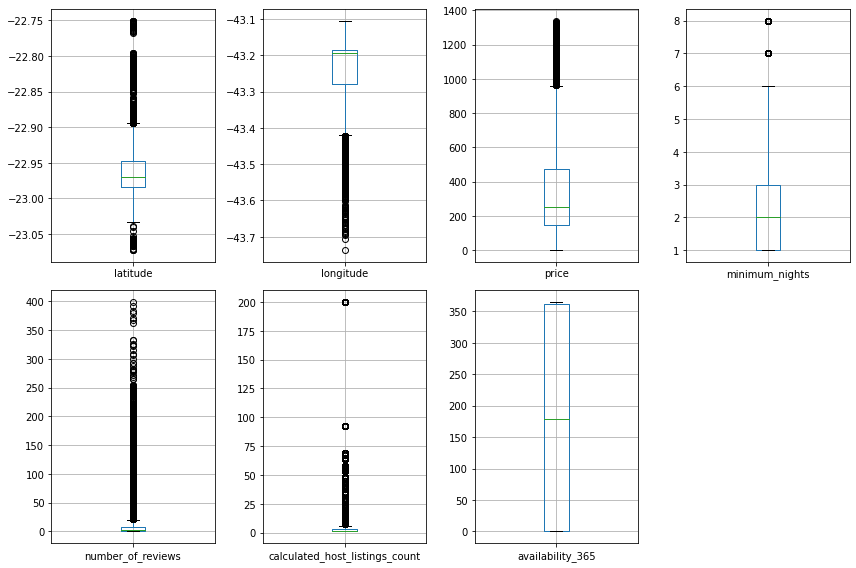

In [32]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuas):
    plt.subplot(2, 4, i + 1);
    df.boxplot(col);
    plt.tight_layout()
    

Analisando-se os Boxplots acima, percebe-se que a variável PERMEABILITY possui um outlier

In [33]:
df['price'].quantile(0.25)

149.0

In [34]:
Q1 = df.price.quantile(0.25)
Q2 = df.price.quantile(0.5)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
print("O valor do 1º quartil é {}, o do 2º quartil (mediana) é {} e do 3º quartil é {}".format(Q1, Q2, Q3))
print("\nO intervalo inter quartil é {}".format(IQR))
#df['PERMEABILITY']=df[~((df.PERMEABILITY < (Q1 - 1.5 * IQR)) | (df.PERMEABILITY > (Q3 + 1.5 * IQR)))]['PERMEABILITY']
print('\n\n Os outliers são:')
df[((df.price < (Q1 - 1.5 * IQR)) | (df.price > (Q3 + 1.5 * IQR)))]['price']

O valor do 1º quartil é 149.0, o do 2º quartil (mediana) é 250.0 e do 3º quartil é 474.0

O intervalo inter quartil é 325.0


 Os outliers são:


9        1143
11       1033
42       1143
69       1054
95       1143
         ... 
29468    1202
29495    1186
29509    1328
29527    1000
29531    1329
Name: price, Length: 1838, dtype: int64

Como pode ser observado, os outliers identificados são muito maiores que os demais valores da dessa variável. Esses valores discrepantes também são prejudiciais ao processo de aprendizagem de máquina, e por isso, também devem ser retirados da base de dados.  

In [35]:
max(df['price'])

1340

In [36]:
df[df['price']==1340]

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
19627,Leblon,-22.98661,-43.23434,Entire home/apt,1340,2,1,1,0


Apesar de alguns valores aparentemente acima do valor esperado para a variável preço, optou-se por não retirá-los pelo fato de tais valores não serem irreais.

## 4 - Pré-processamento dos dados

Como verificado na Análise exploratória dos dados, as variáveis "neighbourhood" e "room_type" são variáveis categóricas, e por isso precisam ser tratadas.

- room_type

A variável room_type apresenta 4 valores possíveis.

Sendo assim, a melhor forma de se representar essa variável é utilizando a representação one-hot encode. Nesse tipo de representação, a distância entre todos os tipos de regitros dessa variável é sempre o mesmo.

Para o caso da variável em questão, a representação poderia ser feita da seguinte forma:
- valor 1: [1, 0, 0, 0]
- valor 2: [0, 1, 0, 0]
- valor 3: [0, 0, 1, 0]
- valor 4: [0, 0, 0, 1]

In [37]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,1,0
1,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,1,69
2,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,3,95
3,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,1,0
4,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,1,358


In [38]:
#transformação da variável room_type
df=pd.get_dummies(df,columns=['room_type'],drop_first=True)
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Copacabana,-22.96592,-43.17896,218,5,251,1,0,0,0,0
1,Ipanema,-22.98467,-43.19611,422,5,94,1,69,0,0,0
2,Copacabana,-22.97712,-43.19045,158,7,238,3,95,0,0,0
3,Ipanema,-22.98302,-43.21427,342,2,282,1,0,0,0,0
4,Ipanema,-22.98816,-43.19359,479,2,181,1,358,0,0,0


- neighbourhood

Oprtou-se por grupar os bairros por zonas

In [39]:
df_bairros=pd.read_csv('data/BairrosRJ.csv')

In [40]:
df_bairros

,zona,bairro
0,Central,São Cristóvão
1,Central,Benfica
2,Central,Caju
3,Central,Catumbi
4,Central,Centro
...,...,...
159,Norte,Vicente de Carvalho
160,Norte,Vigário Geral
161,Norte,Vila da Penha
162,Norte,Vila Kosmos


In [41]:
new=pd.merge(df, df_bairros, left_on='neighbourhood', right_on='bairro', how='left')

In [42]:
#df.room_type.value_counts()
new.zona.value_counts()

Sul        18180
Oeste       6993
Central     2391
Norte       1982
Name: zona, dtype: int64

In [43]:
new[new['zona'].isnull()]['neighbourhood'].unique()

array([], dtype=object)

In [44]:
new.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room,zona,bairro
0,Copacabana,-22.96592,-43.17896,218,5,251,1,0,0,0,0,Sul,Copacabana
1,Ipanema,-22.98467,-43.19611,422,5,94,1,69,0,0,0,Sul,Ipanema
2,Copacabana,-22.97712,-43.19045,158,7,238,3,95,0,0,0,Sul,Copacabana
3,Ipanema,-22.98302,-43.21427,342,2,282,1,0,0,0,0,Sul,Ipanema
4,Ipanema,-22.98816,-43.19359,479,2,181,1,358,0,0,0,Sul,Ipanema


In [45]:
#retirada das variáveis 'neighbourhood' e 'bairro'
new.drop(['neighbourhood','bairro'], axis=1, inplace=True)
new.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room,zona
0,-22.96592,-43.17896,218,5,251,1,0,0,0,0,Sul
1,-22.98467,-43.19611,422,5,94,1,69,0,0,0,Sul
2,-22.97712,-43.19045,158,7,238,3,95,0,0,0,Sul
3,-22.98302,-43.21427,342,2,282,1,0,0,0,0,Sul
4,-22.98816,-43.19359,479,2,181,1,358,0,0,0,Sul


In [46]:
#transformação da variável room_type
new=pd.get_dummies(new,columns=['zona'],drop_first=True)
new.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room,zona_Norte,zona_Oeste,zona_Sul
0,-22.96592,-43.17896,218,5,251,1,0,0,0,0,0,0,1
1,-22.98467,-43.19611,422,5,94,1,69,0,0,0,0,0,1
2,-22.97712,-43.19045,158,7,238,3,95,0,0,0,0,0,1
3,-22.98302,-43.21427,342,2,282,1,0,0,0,0,0,0,1
4,-22.98816,-43.19359,479,2,181,1,358,0,0,0,0,0,1


# 5 - Geração dos Modelos

## Métricas de Avaliação

Serão utilizadas 2 métricas de avaliação para se medir o desempenho dos modelos
- Erro Quadrado Médio (Mean Squared Error - MSE)

Esse erro é dado pela média da soma dos quadrados das diferenças entre os valores previstos e os valores reais. Nesse caso, quanto menor o valor dessa métrica, melhor será o modelo.

- Coeficiente de Determinação (R2)

O coeficiente de determinação (R2) é um valor que indica o percentual de variabilidade da variável alvo que pode ser explicado pelo modelo. Um modelo perfeito possui um valor de R2 igual a 1 e um modelo constante, que sempre prevê como saída o valor médio da variável alvo, apresenta um valor de R2 igual a zero. Caso o resultado do modelo seja pior que a previsão pela média, o valor resultante de R2 será negativo.
Dessa forma, quanto mais alto o valor de R2 (quanto mais próximo de 1), melhor será o modelo.

## 5.1 - Geração de Modelos

### Separação das variáveis preditoras e da variável alvo

In [47]:
new.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room,zona_Norte,zona_Oeste,zona_Sul
0,-22.96592,-43.17896,218,5,251,1,0,0,0,0,0,0,1
1,-22.98467,-43.19611,422,5,94,1,69,0,0,0,0,0,1
2,-22.97712,-43.19045,158,7,238,3,95,0,0,0,0,0,1
3,-22.98302,-43.21427,342,2,282,1,0,0,0,0,0,0,1
4,-22.98816,-43.19359,479,2,181,1,358,0,0,0,0,0,1


In [48]:
X=new.drop(['price'], axis=1, inplace=False)
y=new['price']
X.shape, y.shape

((29546, 12), (29546,))

### Separação dos dados de teste e de treino

A base de dados deve ser dividida, de forma que uma parte dos dados seja utilizado para a geração do modelo e a outra parte seja utilizada para a avaliação do modelo gerado.

Sendo assim, o conjunto de dados será dividido de forma que 70% desses dados seja utilizado para a geração do modelo e 30% para a avaliação

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [50]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape 

((20682, 12), (8864, 12), (20682,), (8864,))

Como pode ser visto, serão utilizados 20682 registros para o treinamento do modelo, e 8864 para o teste.

### Padronização dos dados

In [51]:
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room,zona_Norte,zona_Oeste,zona_Sul
8581,-22.96387,-43.17259,1,53,1,364,0,0,0,0,0,1
10011,-23.01528,-43.47180,3,5,1,0,0,0,0,0,1,0
3943,-22.93832,-43.17864,3,8,1,232,0,0,0,0,0,1
24467,-22.98603,-43.19090,3,1,3,364,0,0,0,0,0,1
28191,-22.98399,-43.20663,3,4,3,89,0,0,0,0,0,1


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [53]:
X_train_scaled[:5]

array([[ 0.05263052,  0.77132838, -1.0242657 ,  1.50465928, -0.25768475,
         1.21753877, -0.07477621, -0.62787696, -0.15381379, -0.26769711,
        -0.5544503 ,  0.79003532],
       [-1.53875654, -2.46873588,  0.22228386, -0.23267581, -0.25768475,
        -1.20212133, -0.07477621, -0.62787696, -0.15381379, -0.26769711,
         1.80358817, -1.2657662 ],
       [ 0.84352605,  0.70581457,  0.22228386, -0.12409236, -0.25768475,
         0.34007961, -0.07477621, -0.62787696, -0.15381379, -0.26769711,
        -0.5544503 ,  0.79003532],
       [-0.63332819,  0.57305434,  0.22228386, -0.37745373, -0.14411973,
         1.21753877, -0.07477621, -0.62787696, -0.15381379, -0.26769711,
        -0.5544503 ,  0.79003532],
       [-0.57018037,  0.40271842,  0.22228386, -0.26887029, -0.14411973,
        -0.61050114, -0.07477621, -0.62787696, -0.15381379, -0.26769711,
        -0.5544503 ,  0.79003532]])

### Geração dos Modelos

Testou-se o conjunto de dados preparado em 5 Algoritmos de aprendizagem de máquina para problemas de regressão distintos.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


#### Base Line

In [55]:
def retornaMedia(y):
    tamanhoAmostra=len(y)
    media=y.mean()
    y_pred=[]
    for i in range(0,tamanhoAmostra):
        y_pred.append(media)
    return y_pred

In [56]:
p=retornaMedia(y_test)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("Os valores da métrica para a base line sãor2 = {} e MSE = {}".format(r2,mse))

Os valores da métrica para a base line sãor2 = 0.0 e MSE = 78215.50885654331


#### Regressão Linear Simples

In [57]:
mdl=LinearRegression()
mdl.fit(X_train_scaled, y_train)
p=mdl.predict(X_test_scaled)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

r2 = 0.15696080930080847 e MSE = 65938.73928654572


#### Regressão Ridge

In [58]:
mdl=Ridge()
mdl.fit(X_train_scaled, y_train)
p=mdl.predict(X_test_scaled)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

r2 = 0.15696104997927796 e MSE = 65938.72046175676


#### Regressão Lasso

In [59]:
mdl=Lasso()
mdl.fit(X_train_scaled, y_train)
p=mdl.predict(X_test_scaled)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

r2 = 0.157067661649976 e MSE = 65930.38177568307


#### KNN Regressor

In [60]:
mdl=KNeighborsRegressor()
mdl.fit(X_train_scaled, y_train)
p=mdl.predict(X_test_scaled)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

r2 = 0.15348128098150315 e MSE = 66210.89236462093


#### DecisionTreeRegressor

In [61]:
mdl=DecisionTreeRegressor()
mdl.fit(X_train_scaled, y_train)
p=mdl.predict(X_test_scaled)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

r2 = -0.35274982041287695 e MSE = 105806.01555919074


#### Regressor SVM

In [62]:
mdl=SVR(C = 1000, gamma = 0.1)
mdl.fit(X_train_scaled, y_train)
p=mdl.predict(X_test_scaled)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

r2 = 0.20284125467022152 e MSE = 62350.17690541224


#### Gradient Boosting Regressor

In [63]:
mdl=GradientBoostingRegressor()
mdl.fit(X_train_scaled, y_train)
p=mdl.predict(X_test_scaled)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

r2 = 0.29451940361424045 e MSE = 55179.52383472984


In [64]:
X_test.shape

(8864, 12)

In [65]:
X_train_scaled.shape[1:]

(12,)

In [66]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense

In [67]:
model = Sequential()
model.add(layers.Dense(10, activation='relu',input_shape=[12]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [68]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [69]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 899
Trainable params: 899
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(X_train_scaled, y_train,
  epochs=20, validation_split = 0.2)

Epoch 1/20
518/518 [==============================] - 0s 629us/step - loss: 163762.2344 - mae: 295.7498 - mse: 163762.2344 - val_loss: 89846.2656 - val_mae: 196.4248 - val_mse: 89846.2656
Epoch 2/20
518/518 [==============================] - 0s 485us/step - loss: 70518.2422 - mae: 191.6232 - mse: 70518.2422 - val_loss: 63265.5898 - val_mae: 187.7186 - val_mse: 63265.5898
Epoch 3/20
518/518 [==============================] - 0s 497us/step - loss: 65154.7148 - mae: 190.1494 - mse: 65154.7148 - val_loss: 62254.8672 - val_mae: 185.6583 - val_mse: 62254.8672
Epoch 4/20
518/518 [==============================] - 0s 509us/step - loss: 64372.1172 - mae: 188.9612 - mse: 64372.1172 - val_loss: 61682.5469 - val_mae: 181.6050 - val_mse: 61682.5469
Epoch 5/20
518/518 [==============================] - 0s 487us/step - loss: 63925.0977 - mae: 187.4851 - mse: 63925.0977 - val_loss: 61295.6797 - val_mae: 184.5753 - val_mse: 61295.6797
Epoch 6/20
518/518 [==============================] - 0s 513us/step 

In [71]:
p=model.predict(X_test_scaled)

In [72]:

r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

r2 = 0.21575664697095787 e MSE = 61339.99292452827


### Otimização de Parâmetros

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

gbr=GradientBoostingRegressor()
mdl = RandomizedSearchCV(gbr, param_grid)
mdl.fit(X_train_scaled, y_train)


RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.02, 0.05],
                                        'max_depth': [1, 2],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [500, 1000]})

In [76]:
p=mdl.predict(X_test_scaled)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

r2 = 0.28863824623518575 e MSE = 55639.52155179801


In [ ]:
mdl.best_params_

## 5.2 - Salvando o melhor modelo Modelo

In [78]:
import joblib as jb

mdl=GradientBoostingRegressor()
mdl.fit(X_train_scaled, y_train)
p=mdl.predict(X_test_scaled)
r2=r2_score(y_test, p)
mse=mean_squared_error(y_test, p)
print("r2 = {} e MSE = {}".format(r2,mse))

jb.dump(mdl, "modelo.pkl.z")

r2 = 0.29451940361424045 e MSE = 55179.52383472984


['modelo.pkl.z']

Recuperando o modelo

In [79]:
mdl2=jb.load("modelo.pkl.z")
p=mdl2.predict(X_test_scaled)
p[0:5]

array([143.51555643, 272.28334259, 496.60798777, 461.72203445,
       456.82282231])